In [1]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pgf')

notebookPlotFlag = False ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
## original data with least_squares
tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])
print(fluxNorm)
#tess_2020bpi.head()
## Fausnaugh Updated Data with least_squares
tess_2020bpi_a = pd.read_csv('JhaData/TESS_SN2020bpi_updated.csv')
tess_2020bpi_a_norm = normLC(tess_2020bpi_a)

## Original Data with MCMC (only sector21)
tess_2020bpi_s21_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_MCMC.csv')
tess_2020bpi_s21_mcmc_norm = normLC(tess_2020bpi_s21_mcmc)

## Fausnaugh Updated Data with MCMC (only sector21)
tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)
tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm
tess_2020bpi_s21_a_mcmc_norm_smol['flux_roll'] = tess_2020bpi_s21_a_mcmc_norm_smol['flux'].rolling(24).median()
tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm_smol.query('flux_roll < 1')

##ZTF Data
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()
                        ]
tess_2020bpi_s21_a_mcmc_norm_smol

0.05428581325102484


BTJD          mjd        cts      e_cts  bkg_model  raw_flux  \
23   1870.92322  58870.42322 -6245.7588  1283.5042   0.004355 -0.710614   
24   1870.94405  58870.44405 -7726.8164  1204.5670   0.003435 -0.879122   
25   1870.96488  58870.46488 -7424.3992  1223.1407   0.003404 -0.844714   
26   1870.98571  58870.48571 -8717.5175  1146.6403   0.003404 -0.991839   
27   1871.00655  58870.50655 -8900.9508  1186.4059   0.003404 -1.012709   
..          ...          ...        ...        ...        ...       ...   
767  1887.42237  58886.92237  3063.6178  1081.9613   0.013214  0.348564   
768  1887.44320  58886.94320  7494.1792  1076.2319   0.013214  0.852653   
769  1887.46404  58886.96404  9677.6894  1087.2857   0.013214  1.101083   
770  1887.48487  58886.98487  6322.7318  1003.4828   0.012208  0.719371   
771  1887.50570  58887.00570  6194.0390  1002.2252   0.012208  0.704729   

     e_raw_flux      flux    e_flux     mjd_0  flux_roll  
23     0.146031 -0.012582  0.120627   0.47914  -0.038801  
24     0.137050 -0.129525  0.113208   0.49997  -0.048610  
25     0.139163 -0.100358  0.114954   0.52080  -0.048610  
26     0.130459 -0.221889  0.107764   0.54163  -0.080985  
27     0.134984 -0.239128  0.111501   0.56247  -0.080985  
..          ...       ...       ...       ...        ...  
767    0.123101  0.648106  0.101686  16.97829   0.967042  
768    0.122449  1.064501  0.101147  16.99912   0.987301  
769    0.123706  1.269713  0.102186  17.01996   0.997786  
770    0.114172  0.978732  0.094310  17.04079   0.997786  
771    0.114029  0.966637  0.094192  17.06162   0.997786  

[749 rows x 11 columns]

(-2.800984000018798, 28.676865000184627)

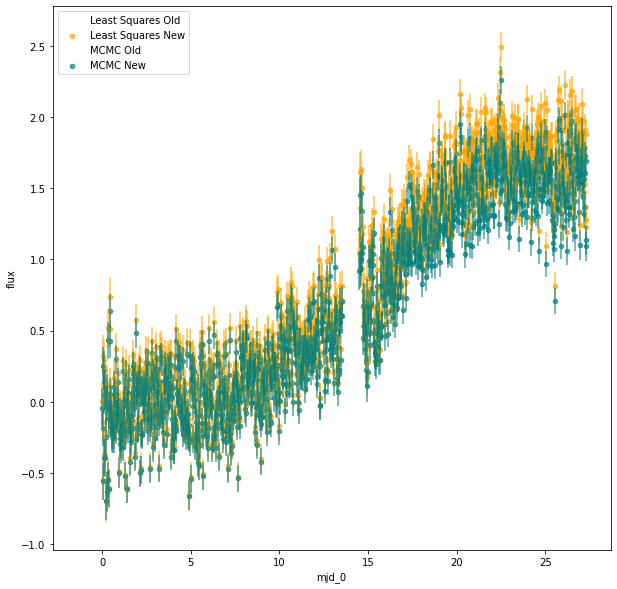

In [3]:
ax = tess_2020bpi_norm.plot('mjd_0','flux',yerr='e_flux',color='black',alpha=0.0,kind='scatter',figsize=(10,10),label='Least Squares Old')
tess_2020bpi_a_norm.plot('mjd_0','flux',yerr='e_flux',color='orange',alpha=0.7,kind='scatter',ax=ax,label='Least Squares New')
tess_2020bpi_s21_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='red',alpha=0.0,kind='scatter',ax=ax,label='MCMC Old')
tess_2020bpi_s21_a_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='teal',alpha=0.7,kind='scatter',ax=ax,label='MCMC New')
ax.set_xlim(right=1.05*tess_2020bpi_s21_mcmc_norm['mjd_0'].max())


In [4]:
# ax = tess_2020bpi_norm.plot(x='mjd_0',y='flux',yerr='e_flux',kind='scatter',color='blue',label='original corrected',alpha=0.35)
# tess_2020bpi_a_norm.plot(x='mjd_0',y='flux',yerr='e_flux',kind='scatter',color='red',alpha=0.25,label='new corrected',ax=ax)
# ax.set_xlim(0,17)

# ax1 = tess_2020bpi_norm.plot(x='mjd_0',y='raw_flux',yerr='e_raw_flux',kind='scatter',color='blue',label='original raw',alpha=0.35)
# tess_2020bpi_a_norm.plot(x='mjd_0',y='raw_flux',yerr='e_raw_flux',kind='scatter',color='red',alpha=0.25,label='new raw',ax=ax1)
# ax1.set_xlim(0,17)
# print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.std(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.std()])
# print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.std(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.std()])
# print()
# print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.mean(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.mean()])
# print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.mean(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.mean()])
# print()
# print([tess_2020bpi_norm.query('mjd_0 <16.75').flux.median(),tess_2020bpi_a_norm.query('mjd_0 <16.75').flux.median()])
# print([tess_2020bpi_norm.query('mjd_0 <16.75').raw_flux.median(),tess_2020bpi_a_norm.query('mjd_0 <16.75').raw_flux.median()])
# fig, ax2 = plt.subplots()
# ax2.errorbar(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.raw_flux-tess_2020bpi_a_norm.raw_flux),yerr=np.sqrt(tess_2020bpi_norm.e_raw_flux**2 + tess_2020bpi_a_norm.e_raw_flux**2),
#              color='red',marker='o',markersize=1,linestyle='none',ecolor='maroon',label='raw')
# ax2.errorbar(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.flux-tess_2020bpi_a_norm.flux),yerr=np.sqrt(tess_2020bpi_norm.e_flux**2 + tess_2020bpi_a_norm.e_flux**2),
#              color='lightblue',marker='o',markersize=1,linestyle='none',ecolor='blue',label='corrected')
# ax2.set_xlabel('Time since start of TESS sector 21 (mjd-58870)')
# ax2.set_ylabel('Difference between old and new data')
# ax2.legend()
# #ax2.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.raw_flux-tess_2020bpi_a_norm.raw_flux),color='red')
# ax2.set_xlim(0,17)
# print([len(tess_2020bpi_a_norm.raw_flux),len(tess_2020bpi_a_norm.e_raw_flux**2)])

# fig,ax3 = plt.subplots()
# ax3.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.e_raw_flux-tess_2020bpi_a_norm.e_raw_flux),
#              color='red',s=1,label='raw')
# ax3.scatter(x=tess_2020bpi_norm.mjd_0,y=(tess_2020bpi_norm.e_flux-tess_2020bpi_a_norm.e_flux),
#              color='blue',s=1,label='corrected')
# ax3.set_xlabel('Time since start of TESS sector 21 (mjd-58870)')
# ax3.set_ylabel('Difference between old and new errors')
# ax3.legend()
# ax3.set_xlim(0,17)

sampling...



done


<IPython.core.display.Javascript object>


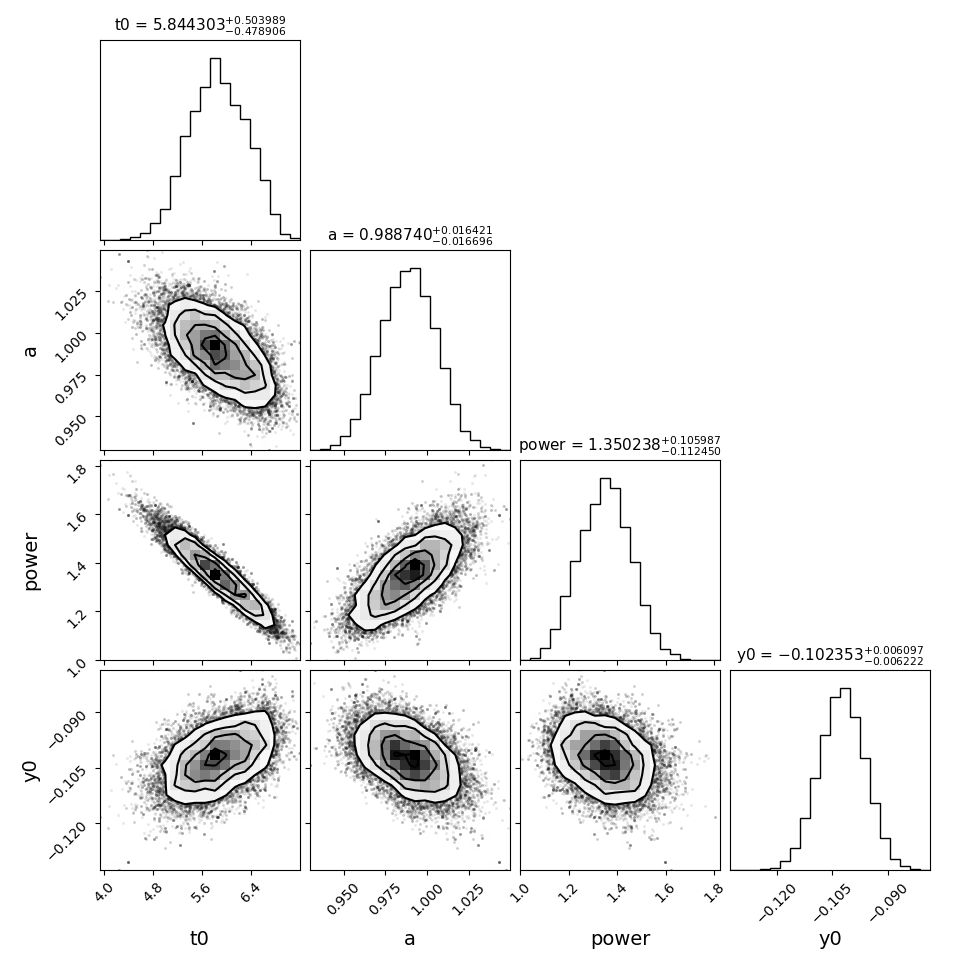

<IPython.core.display.Javascript object>


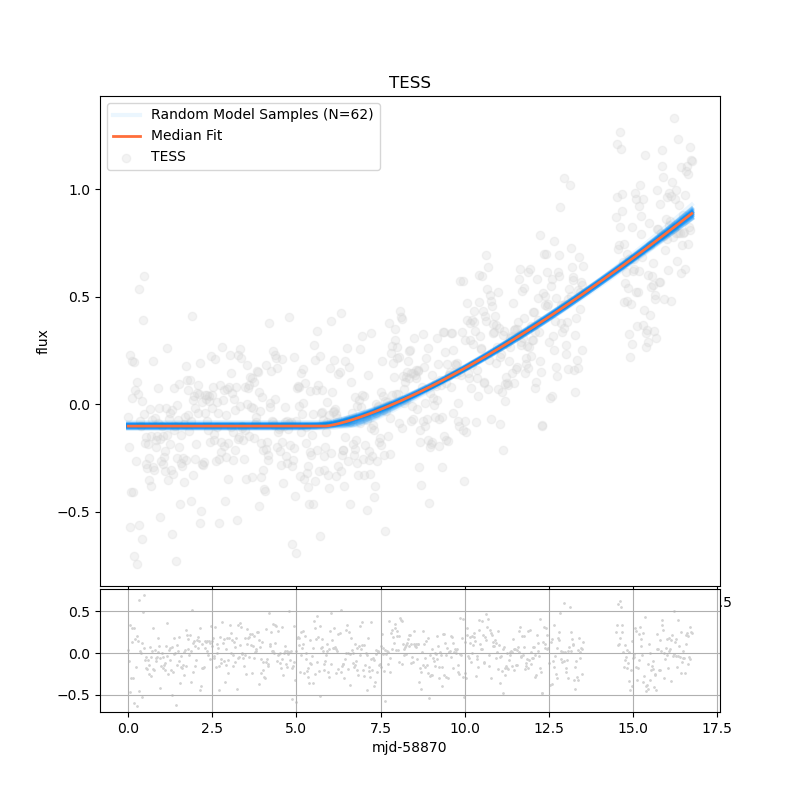

In [55]:
## original data w/ mcmc
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=1000,nsteps=2500,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


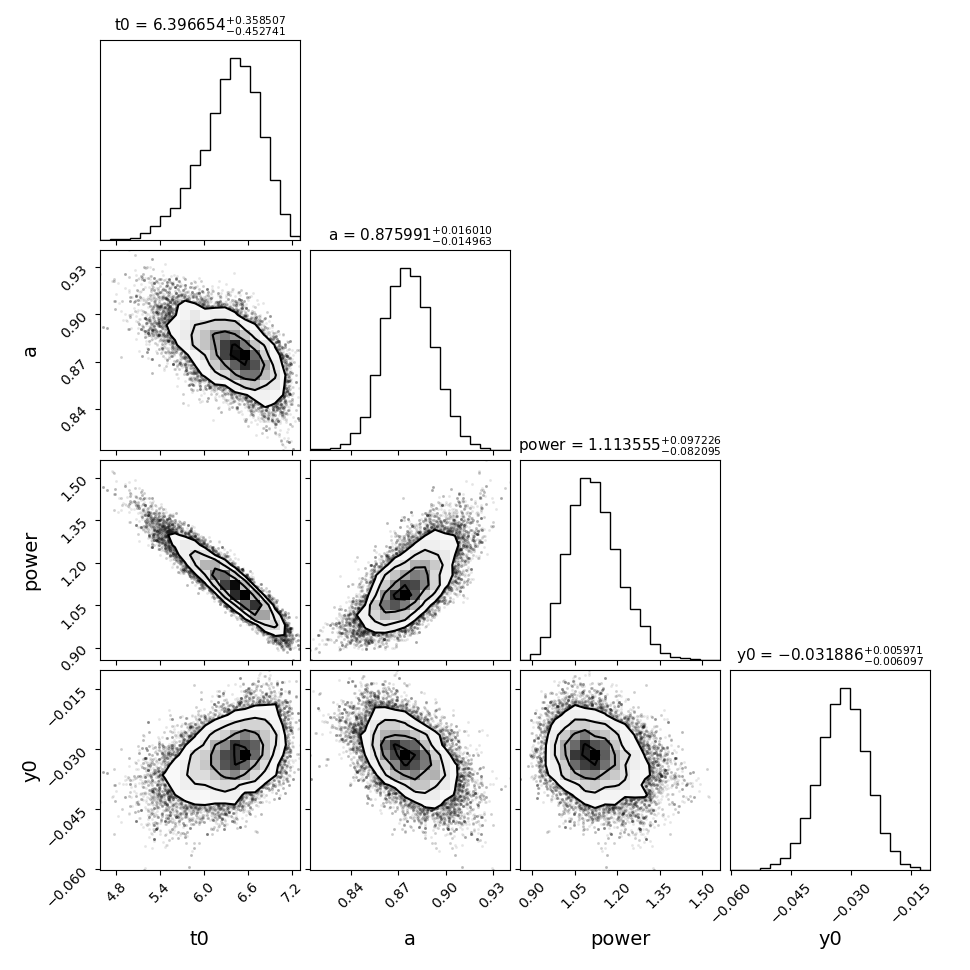

<IPython.core.display.Javascript object>


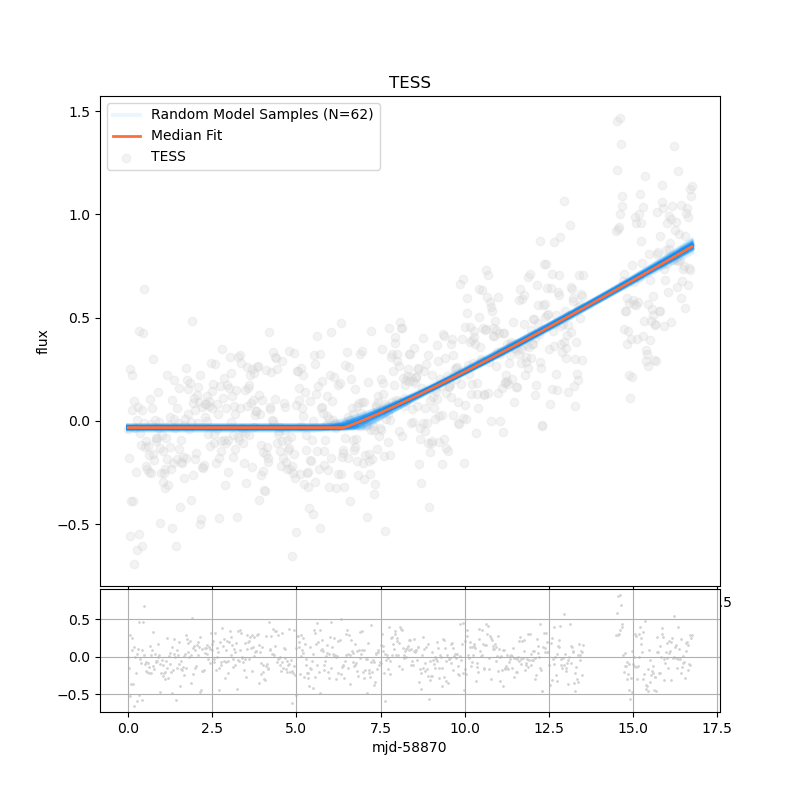

In [56]:
## new data with mcmc
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=1000,nsteps=2500,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


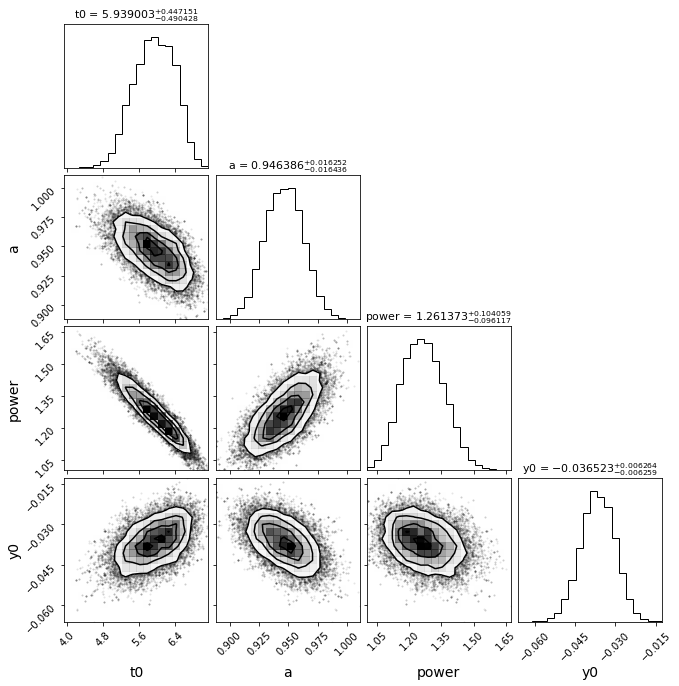

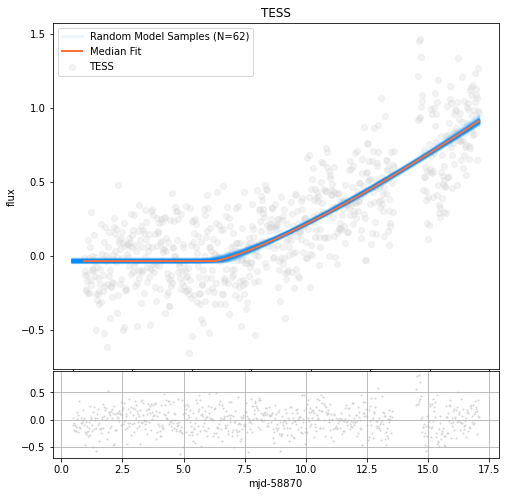

In [13]:
## new data with mcmc (smol edition)
guess = {'t0':5.5, 'a':1,'power':1.8,'y0':-0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm_smol, guess, scale, 
                            nwalkers=25,nburn=1000,nsteps=2500,
                            curveModel='decoupled', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


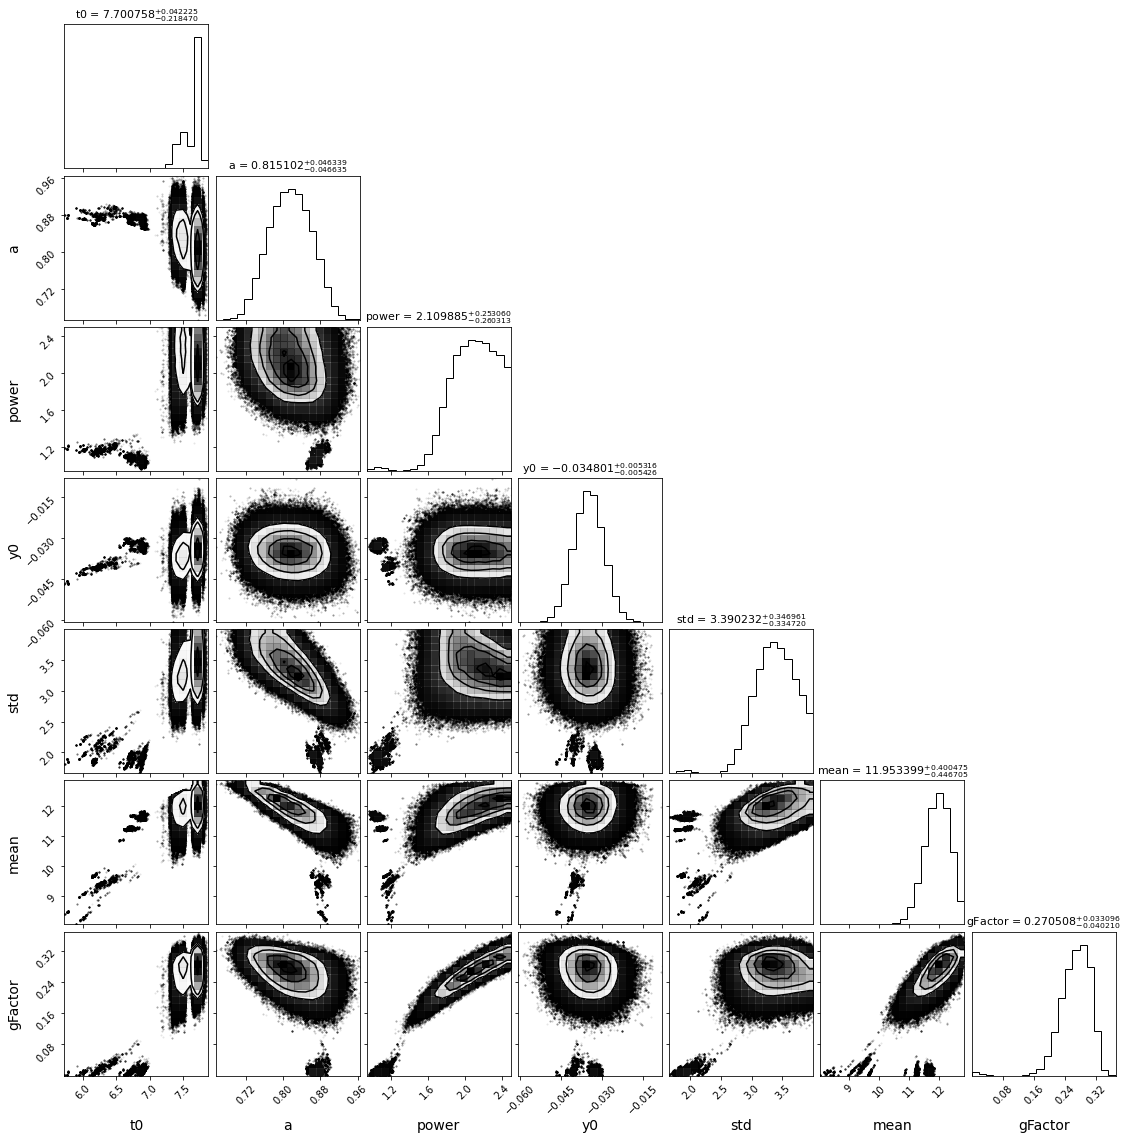

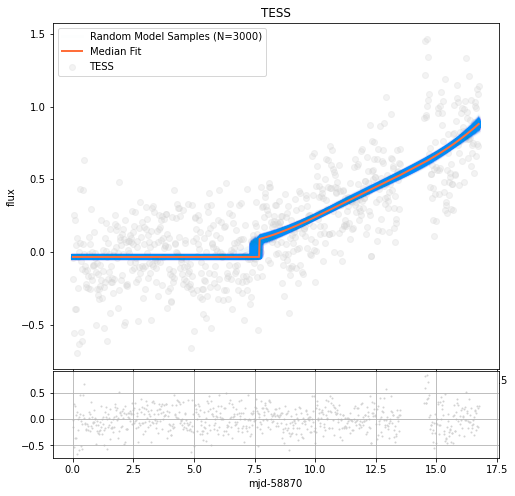

In [11]:
## added power limit back, kept bounds on mean 
guess = {'t0':6, 'a':1,'power':2,'y0':-0.1,'std':3,'mean':10,'gFactor':0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.2,'mean':0.5,'gFactor':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=200,nburn=5000,nsteps=15000,
                            curveModel='dcGauss', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


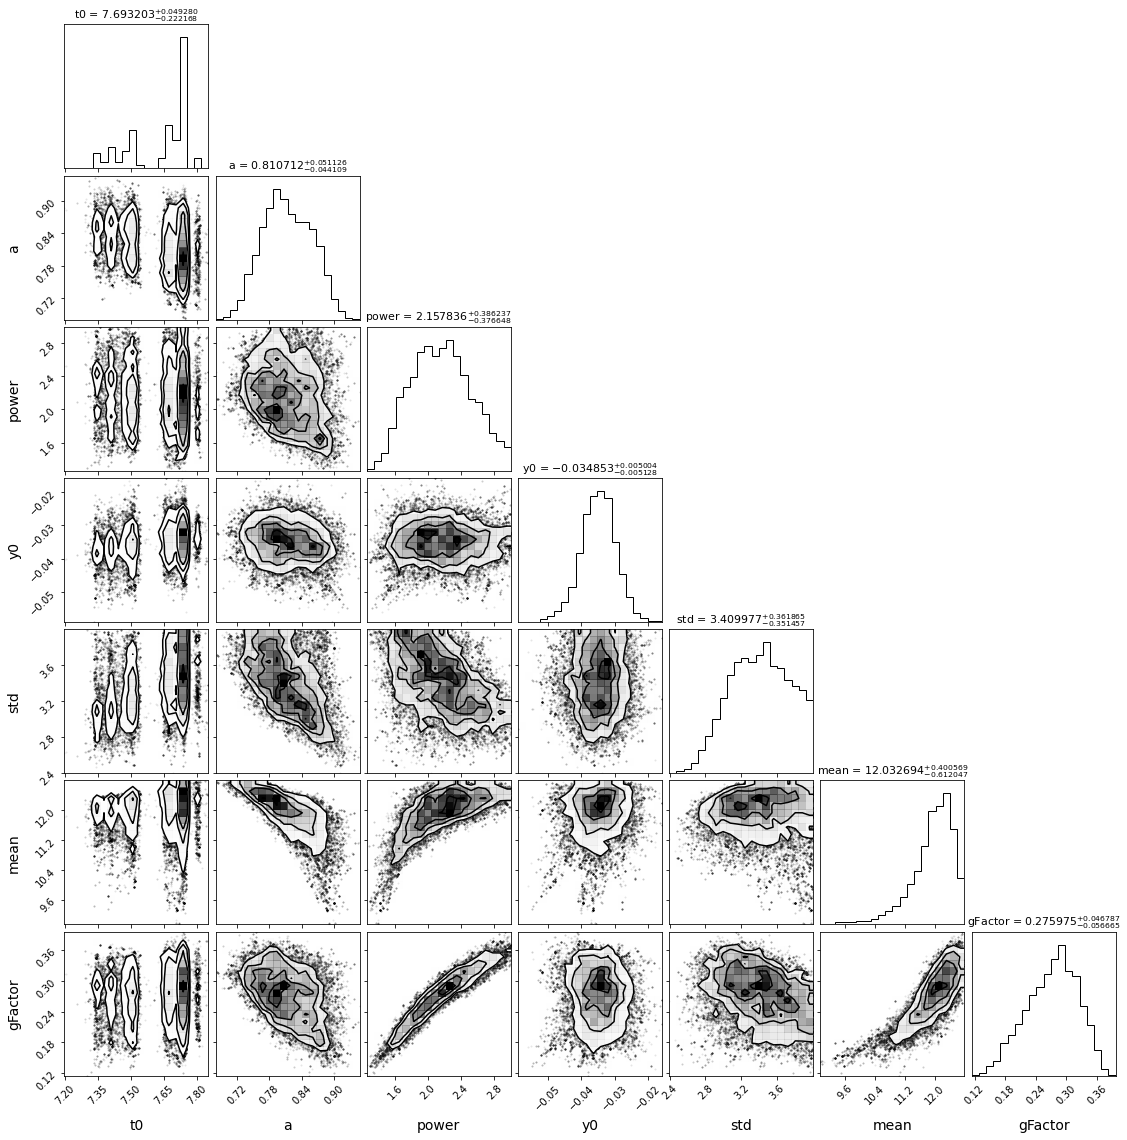

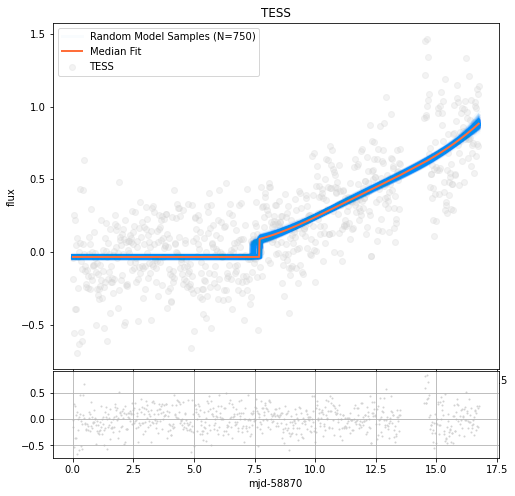

In [10]:
## made power limit 1-3, made bounds on mean  from t0-t0+5
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01,'std':3,'mean':11,'gFactor':0.2} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.07}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=14000,nsteps=15000,
                            curveModel='dcGauss', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


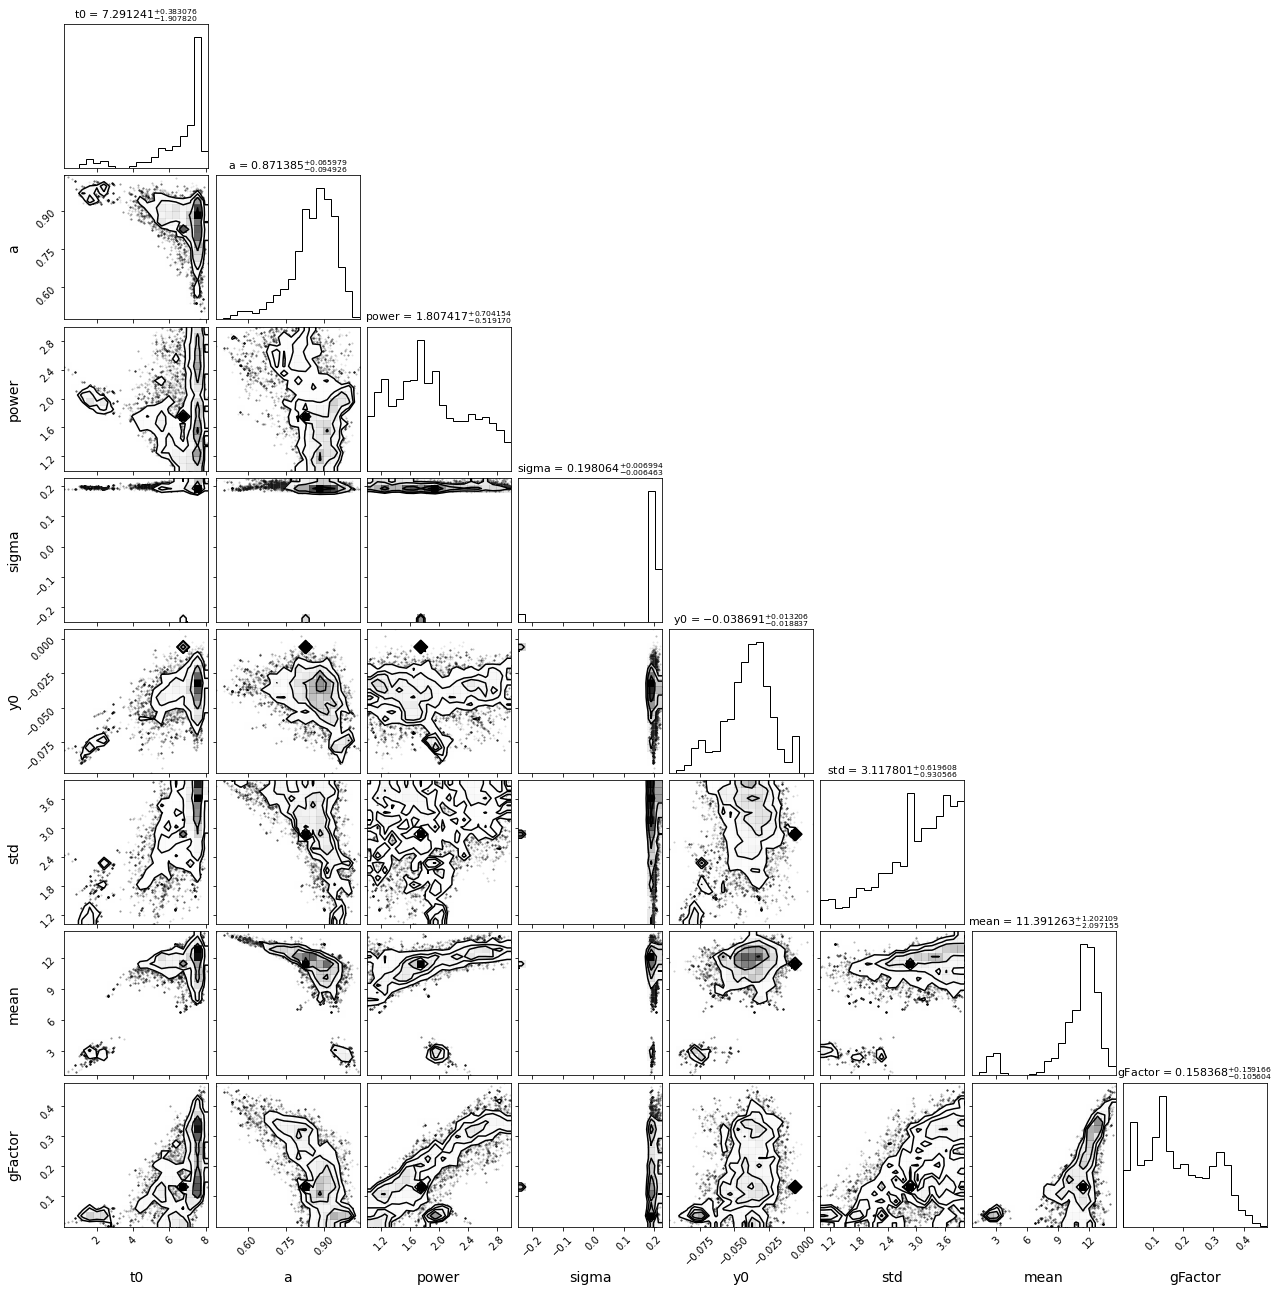

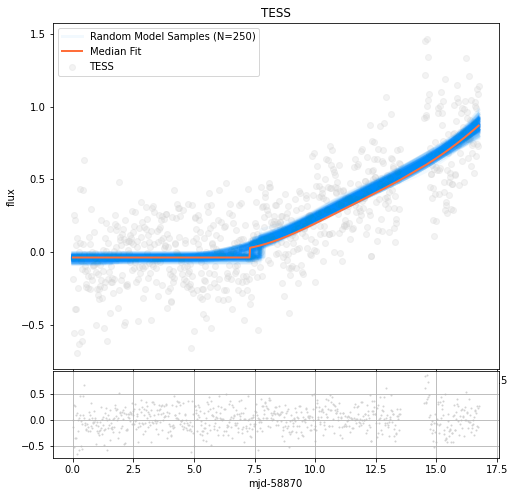

In [17]:
## made power limit 1-3, made bounds on mean  from t0-t0+5
guess = {'t0':7, 'a':1,'power':2,'sigma':0.3,'y0':-0.01,'std':3,'mean':11,'gFactor':0.2} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'sigma':0.1,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.07}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=9000,nsteps=10000,
                            curveModel='dcGauss', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


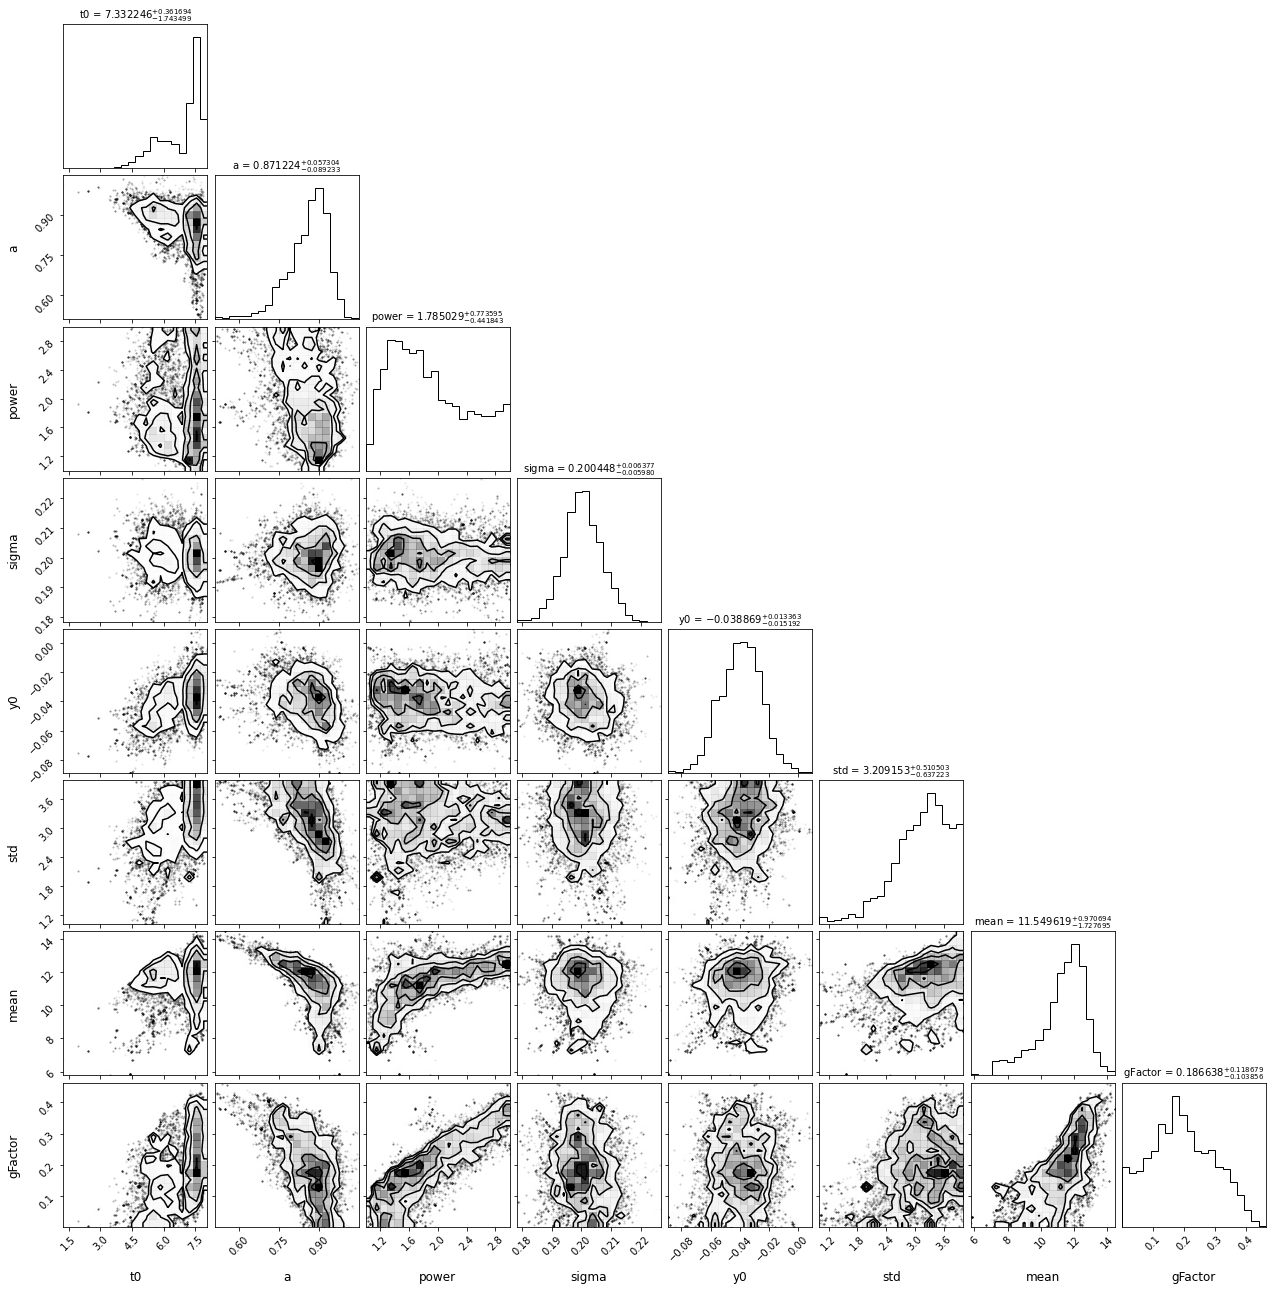

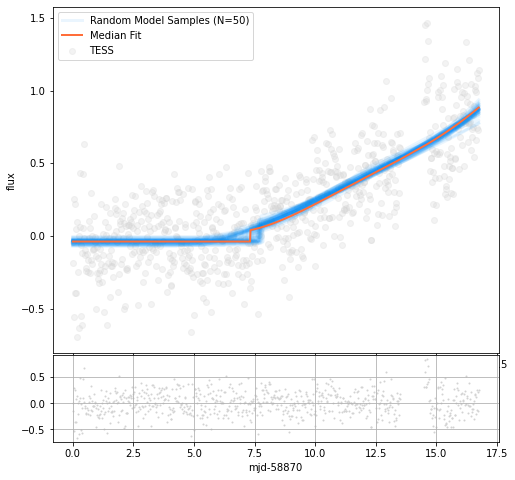

In [5]:
## made power limit 1-3, made bounds on mean  from t0-t0+5
guess = {'t0':7, 'a':1,'power':2,'sigma':0.2,'y0':-0.04,'std':3,'mean':12,'gFactor':0.28} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'sigma':0.05,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=1000,nsteps=2000,
                            curveModel='dcGauss', 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'),savePlots=False,plotExt=plotExtension);

sampling...



done


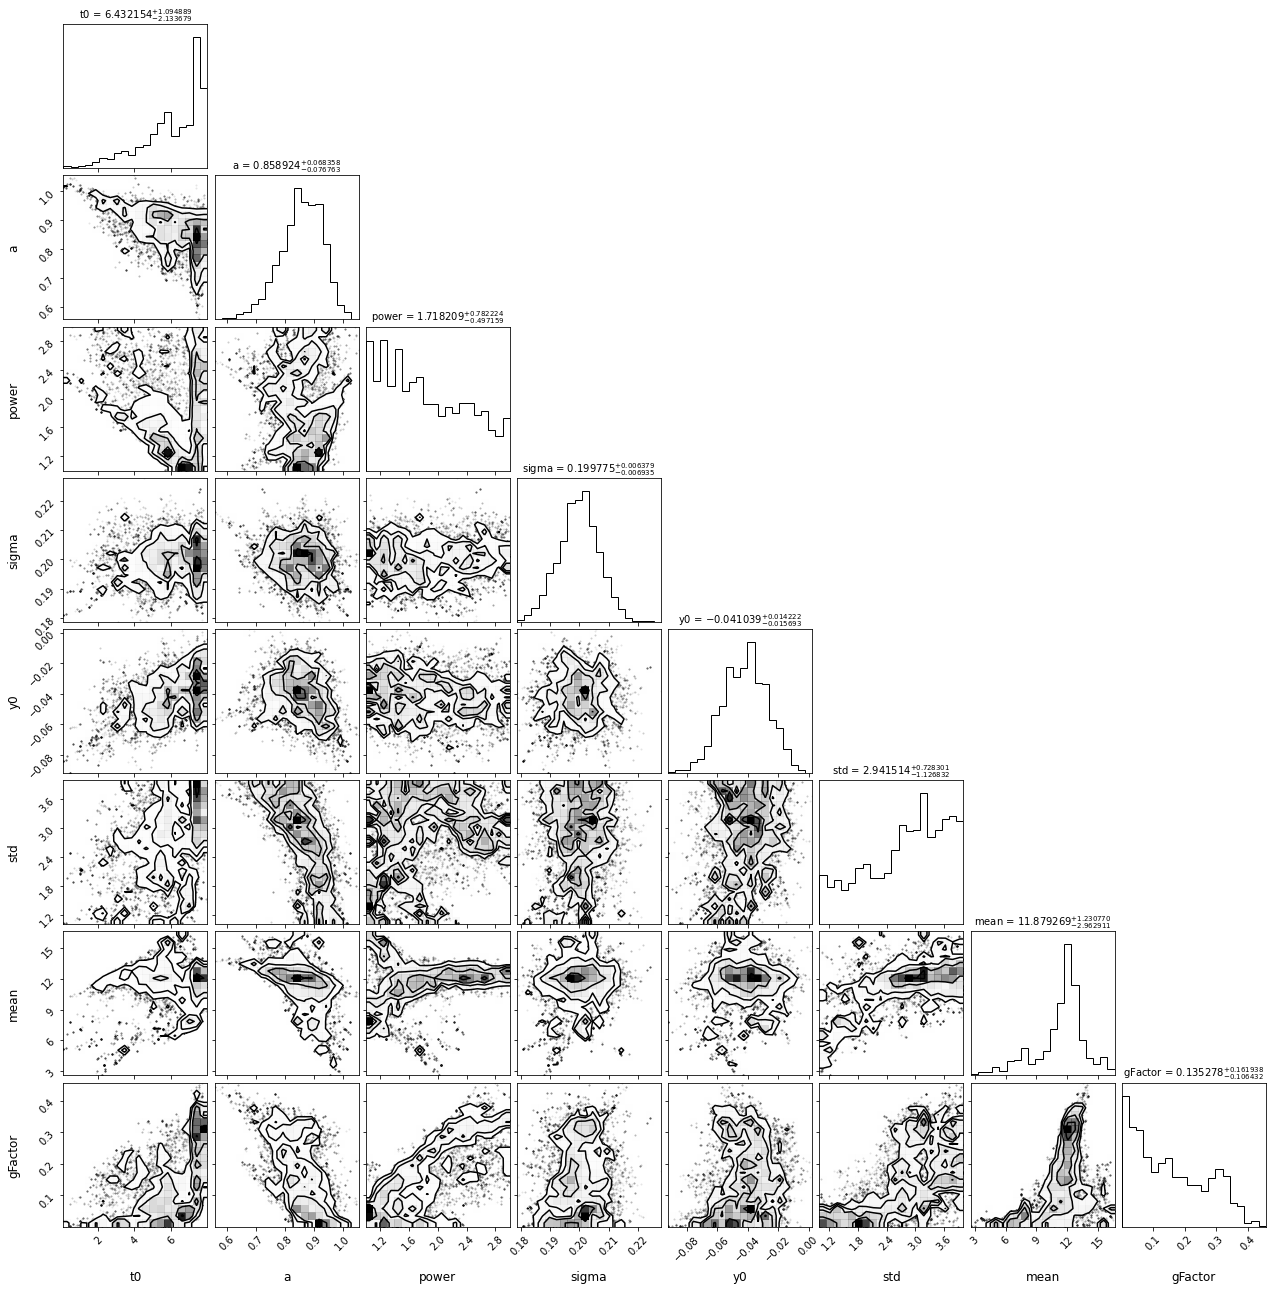

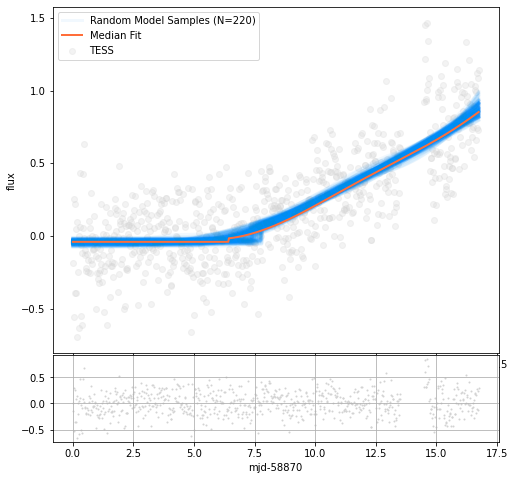

In [10]:
## made power limit 1-3, made bounds on mean  from t0-t0+5
guess = {'t0':7, 'a':1,'power':2,'sigma':0.2,'y0':-0.04,'std':3,'mean':12,'gFactor':0.28} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'sigma':0.05,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=20,nburn=10000,nsteps=11000,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'),savePlots=False,plotExt=plotExtension);

sampling...



done


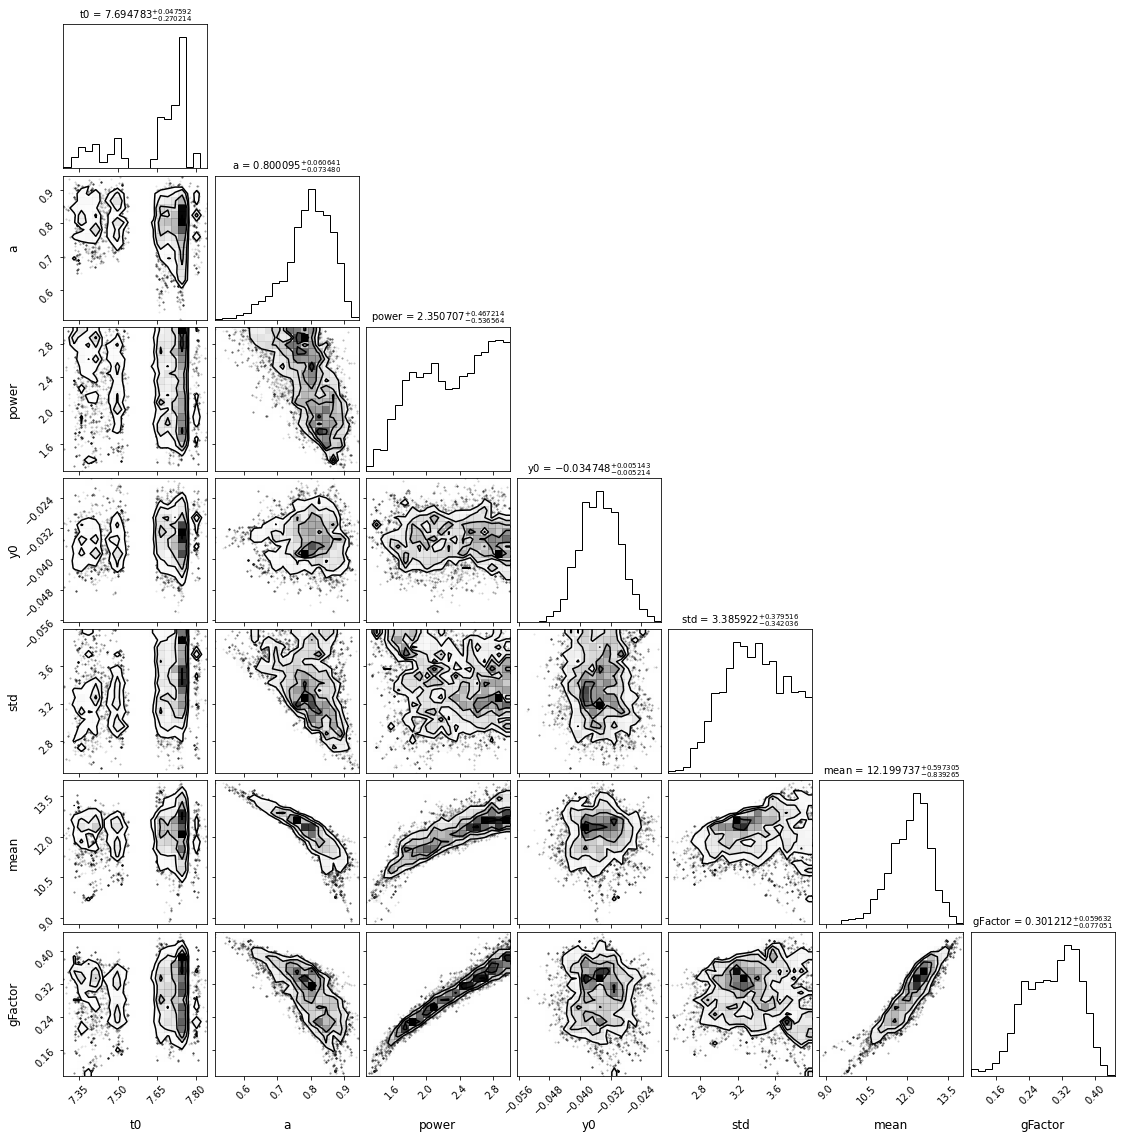

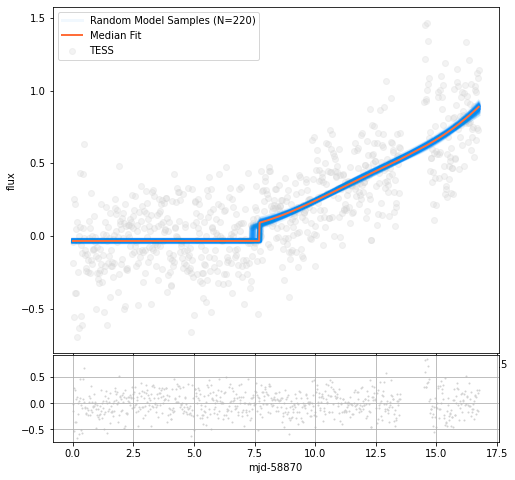

In [11]:
## made power limit 1-3, made bounds on mean  from t0-t0+5
guess = {'t0':7, 'a':1,'power':2,'y0':-0.04,'std':3,'mean':12,'gFactor':0.28} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=20,nburn=10000,nsteps=11000,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'),savePlots=False,plotExt=plotExtension);

sampling...



done


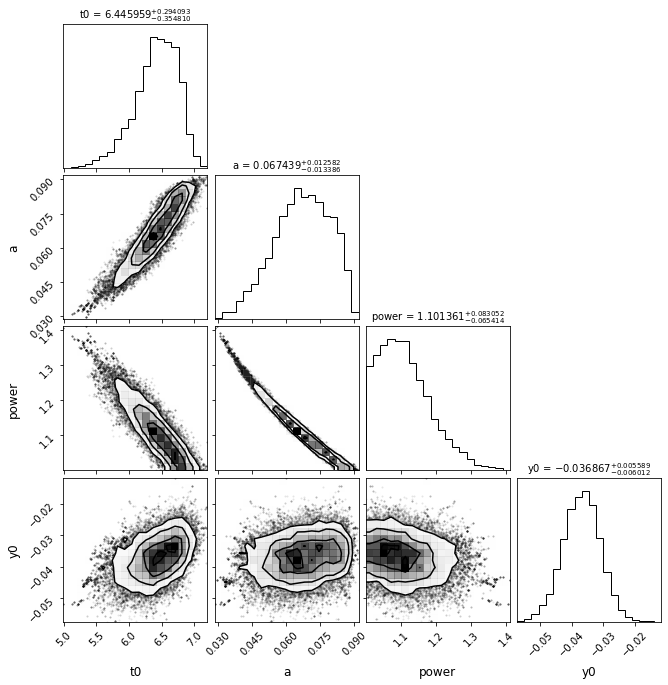

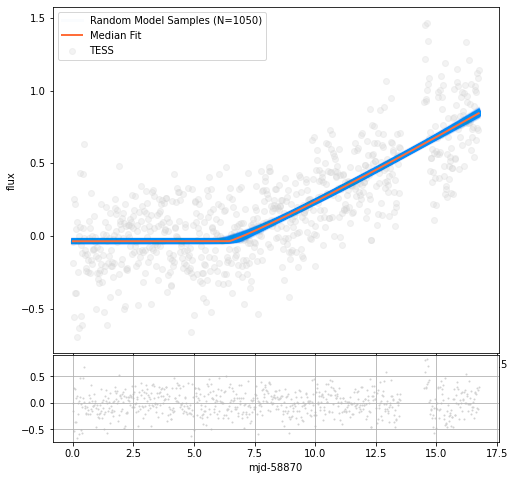

In [8]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.03} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=20000,nsteps=21000,
                            curveModel='standardPlus', savePlots=False,plotExt=plotExtension, 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


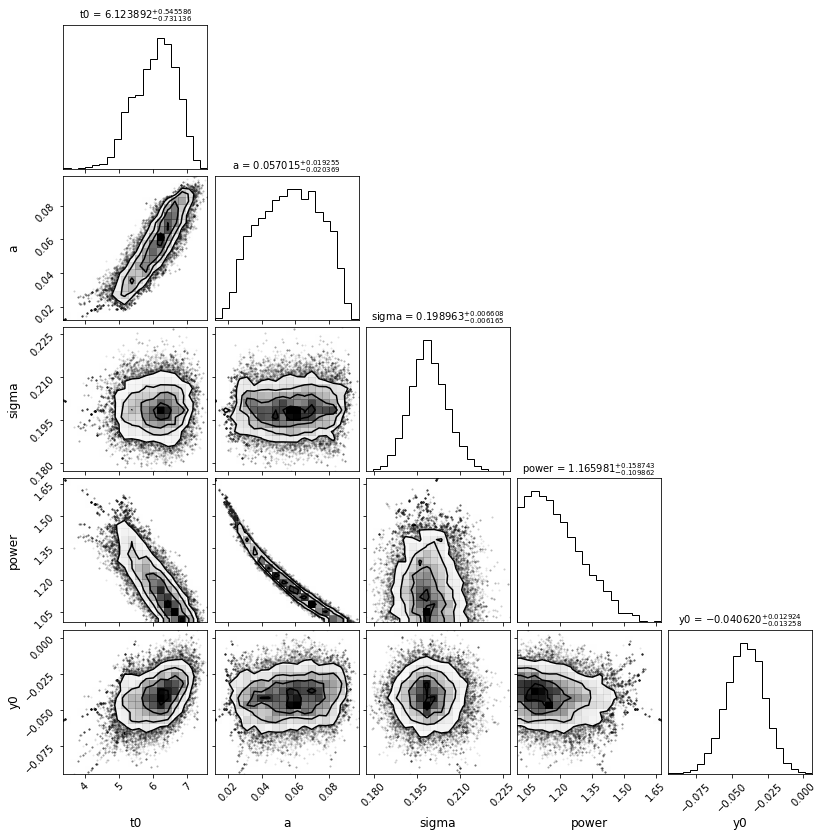

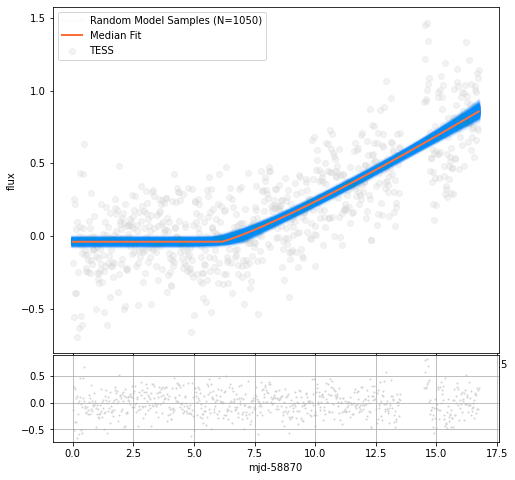

In [12]:
guess = {'t0':7, 'a':1,'sigma':0.2,'power':2,'y0':-0.03} 
scale = {'t0':0.2, 'a':0.1,'sigma':0.1,'power':0.1,'y0':0.01}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=20000,nsteps=21000,
                            curveModel='standardPlus', savePlots=False,plotExt=plotExtension, 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


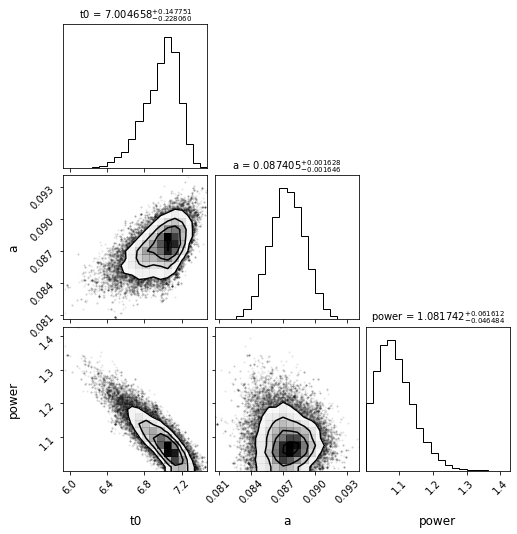

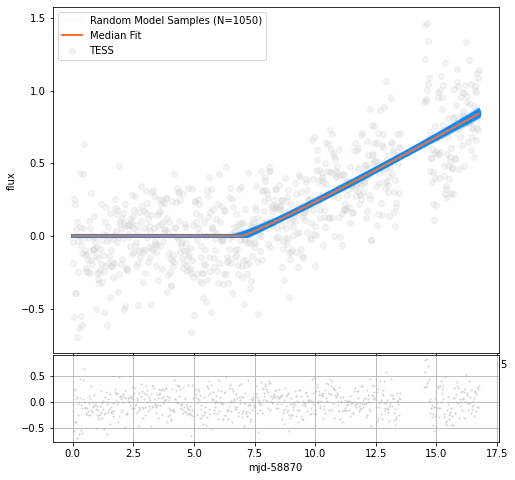

In [13]:
guess = {'t0':7, 'a':1,'power':2} 
scale = {'t0':0.2, 'a':0.1,'power':0.1}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=20000,nsteps=21000,
                            curveModel='powerFix1', savePlots=True,plotExt=plotExtension, 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


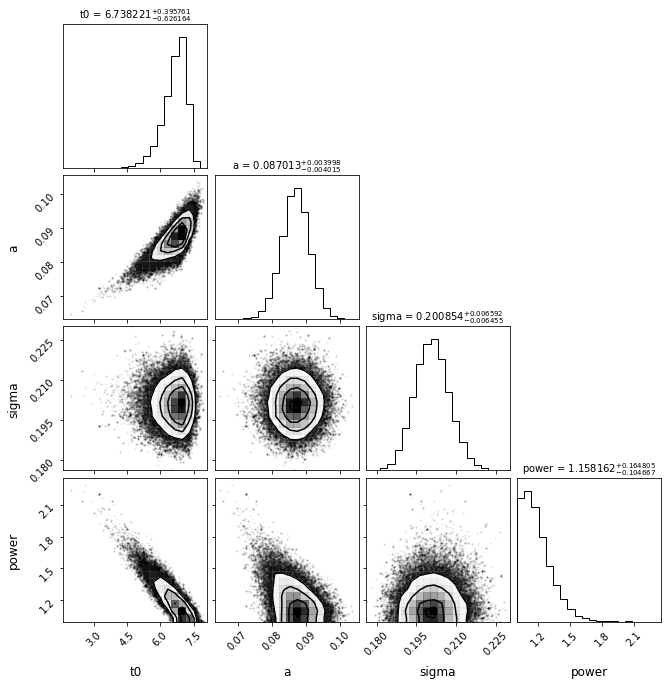

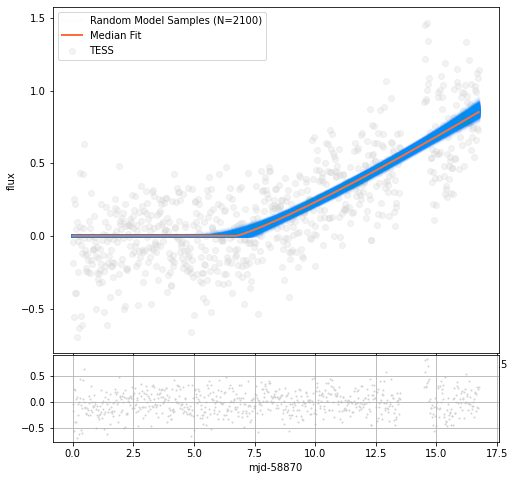

In [14]:
guess = {'t0':7, 'a':1,'sigma':0.2,'power':2} 
scale = {'t0':0.2, 'a':0.1,'sigma':0.1,'power':0.1}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=100,nburn=20000,nsteps=21000,
                            curveModel='powerFix1', savePlots=True,plotExt=plotExtension, 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


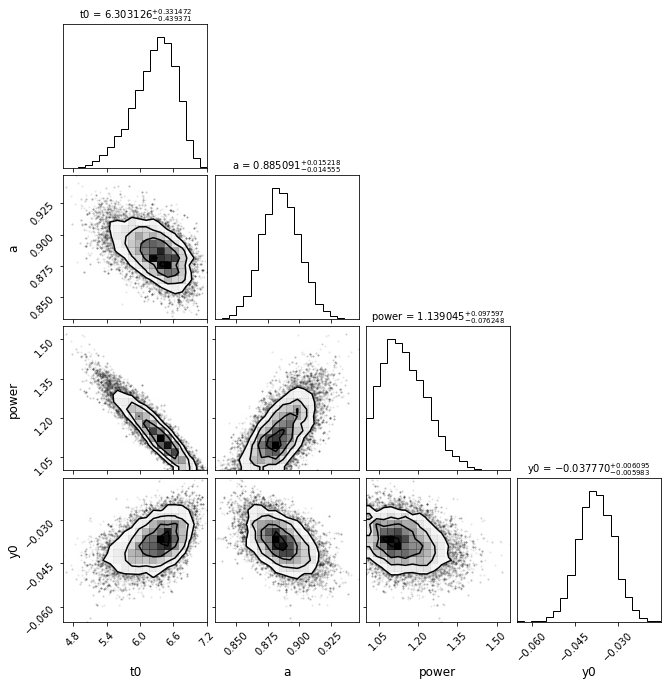

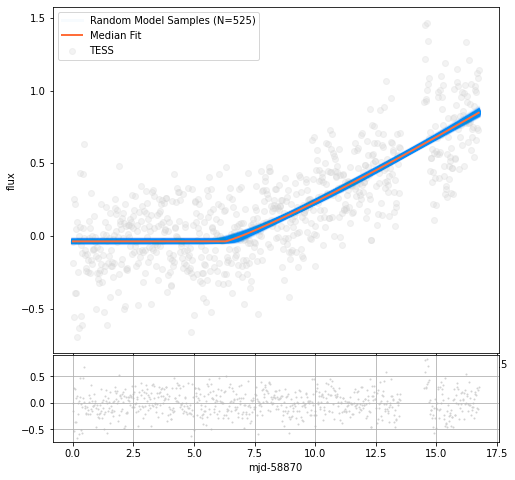

In [15]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.1} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=20000,nsteps=21000,
                            curveModel='decoupled', savePlots=False,plotExt=plotExtension, 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


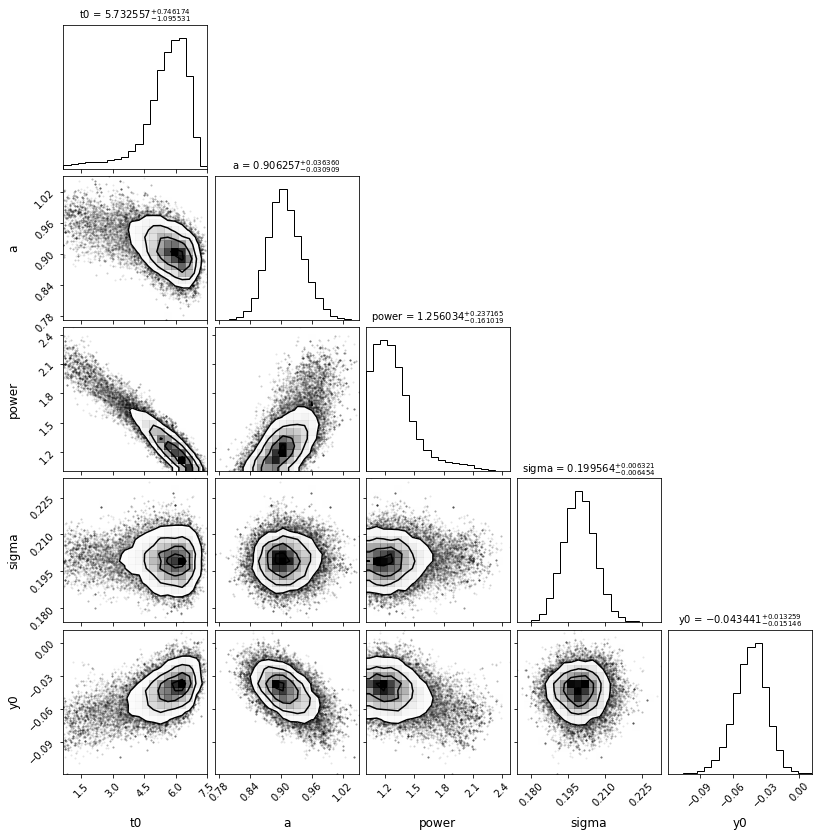

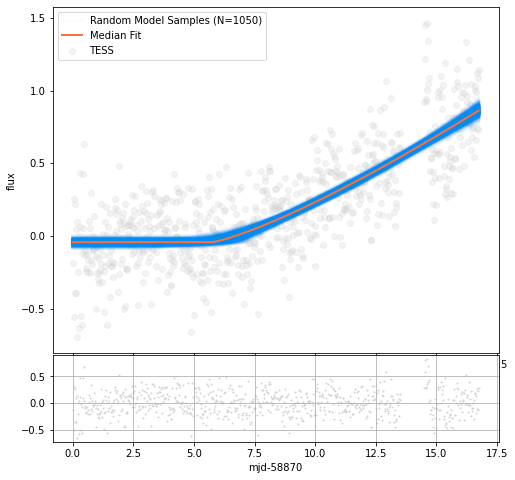

In [16]:
guess = {'t0':7, 'a':1,'power':2,'sigma':0.2,'y0':-0.1} 
scale = {'t0':0.2, 'a':0.2,'power':0.2,'sigma':0.1,'y0':0.05}
fits, randFits = hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=20000,nsteps=21000,
                            curveModel='decoupled', savePlots=False,plotExt=plotExtension, 
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));